In [ ]:
# ZIP 파일 압축 해제

import numpy as np
import zipfile
import pandas as pd

def unzip_folder(zip_path, extract_to='.'):   # content 폴더안에생김
  with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)
    print(f"Unzipped the files in {zip_path} to {extract_to}")

zip_file_path = '/content/drive/MyDrive/dataset.zip'
unzip_folder(zip_file_path)

Unzipped the files in /content/drive/MyDrive/dataset.zip to .


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def load_images_from_folder(folder, target_size=(32, 32)):
    images = []
    labels = []  # 0 for 'cat', 1 for 'dog'

    # 'shoe' 폴더의 이미지 로드
    shoe_folder = os.path.join(folder, 'Shoe')
    for filename in os.listdir(shoe_folder):
        img_path = os.path.join(shoe_folder, filename)
        if (img_path.endswith('.jpg')):
            img = load_img(img_path, target_size=target_size, color_mode='grayscale')
            images.append(img_to_array(img))
            labels.append(0)

    # 'sandal' 폴더의 이미지 로드
    sandal_folder = os.path.join(folder, 'Sandal')
    for filename in os.listdir(sandal_folder):
        img_path = os.path.join(sandal_folder, filename)
        if (img_path.endswith('.jpg')):
            img = load_img(img_path, target_size=target_size, color_mode='grayscale')
            images.append(img_to_array(img))
            labels.append(1)
    # 'boot' 폴더의 이미지 로드
    boot_folder = os.path.join(folder, 'Boot')
    for filename in os.listdir(boot_folder):
        img_path = os.path.join(boot_folder, filename)
        if (img_path.endswith('.jpg')):
            img = load_img(img_path, target_size=target_size, color_mode='grayscale')
            images.append(img_to_array(img))
            labels.append(2)

    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    # 이미지 데이터 정규화 및 라벨 one-hot 인코딩
    #images = images / 255.0

    return images, labels

# 사용 예제
folder_path = '/content/Shoe vs Sandal vs Boot Dataset/'  # 현재 폴더 경로 설정
X, y = load_images_from_folder(folder_path)

print("Number of images:", len(y))
print("Shape of images:", X.shape)
print("Shape of labels:", y.shape)    #

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# 데이터 평탄화 및 정규화
X_train_flat = X_train.reshape((X_train.shape[0], -1)) / 255.0
X_test_flat = X_test.reshape((X_test.shape[0], -1)) / 255.0

Number of images: 15000
Shape of images: (15000, 32, 32, 1)
Shape of labels: (15000,)
X_train shape: (12000, 32, 32, 1)
y_train shape: (12000,)
X_test shape: (3000, 32, 32, 1)
y_test shape: (3000,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# 모델 정의  C = 과적합 및 과소적합 방지, max_iter = 훈련 반복 횟수
# kernel linear rbf 비교하는거 최종발표에 넣기
base_bagging = SVC(kernel='rbf', C=1.0, max_iter=1000, probability=True)

# 기본 모델 정의
bagging_model = BaggingClassifier(base_estimator=base_bagging, n_estimators=10, random_state=42) # bagging
boosting_model = GradientBoostingClassifier(random_state=42, n_estimators=10, learning_rate=0.3) # 의사결정 트리로 고정
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # Random Forest

# 기본 모델 훈련
bagging_model.fit(X_train_flat, y_train)
boosting_model.fit(X_train_flat, y_train)
rf_model.fit(X_train_flat, y_train)

# 기본 모델 예측
bagging_model_pred = bagging_model.predict(X_test_flat)
boosting_model_pred = boosting_model.predict(X_test_flat)
rf_pred = rf_model.predict(X_test_flat)

bagging_acc = accuracy_score(y_test, bagging_model_pred)
boosting_acc = accuracy_score(y_test, boosting_model_pred)
rf_acc = accuracy_score(y_test, rf_pred)

print(f"Bagging Model Accuracy : {bagging_acc:.4f}")
print(f"Gradient Boosting Classifier Accuracy: {boosting_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data 

Bagging Model Accuracy : 0.9353
Gradient Boosting Classifier Accuracy: 0.8807
Random Forest Accuracy: 0.9390


In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
from tqdm import tqdm

# Weighted Averaging
def weighted_predict_ensemble(models, weights, X):
    weighted_predictions = np.zeros((X.shape[0], 3))
    for model, weight in zip(tqdm(models, desc="Predicting with Ensemble"), weights):
        probas = model.predict_proba(X)
        weighted_predictions += weight * probas
    return weighted_predictions

models = [bagging_model, boosting_model, rf_model]

weights = np.array([0.4, 0.2, 0.4])

aw_ensemble_pred = weighted_predict_ensemble(models, weights, X_test_flat)
aw_ensemble_pred_labels = np.argmax(aw_ensemble_pred, axis=1)
aw_ensemble_acc = accuracy_score(y_test, aw_ensemble_pred_labels)
print()
print(f"Weighted Averaging Ensemble Accuracy : {aw_ensemble_acc:.4f}")

Predicting with Ensemble: 100%|██████████| 3/3 [01:43<00:00, 34.66s/it]


Weighted Averaging Ensemble Accuracy : 0.9360


In [ ]:
# Majority Voting (hard)
import numpy as np
from scipy.stats import mode
from tqdm import tqdm
from sklearn.metrics import accuracy_score

def majority_voting(models, X):
  pred = np.array([model.predict(X) for model in tqdm(models, desc="Predicting with Ensemble")])
  vote = mode(pred, axis=0)[0]
  return vote.flatten()

models = [bagging_model, boosting_model, rf_model]
voting_ensemble_pred_labels = majority_voting(models, X_test_flat)
voting_ensemble_acc = accuracy_score(y_test, voting_ensemble_pred_labels)
print(f"Majority Voting Ensemble Accuracy : {voting_ensemble_acc:.4f}")

Predicting with Ensemble: 100%|██████████| 3/3 [01:46<00:00, 35.57s/it]


Majority Voting Ensemble Accuracy : 0.9327


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

base_models = [bagging_model, boosting_model, rf_model]
meta_model = LogisticRegression(random_state=42, max_iter=20000)

# 각 모델별로 데이터 셋 만들기
aw_ensemble_pred_train = weighted_predict_ensemble(models, weights, X_train_flat)
aw_ensemble_pred_test = weighted_predict_ensemble(models, weights, X_test_flat)
aw_ensemble_pred_train_labels = np.argmax(aw_ensemble_pred_train, axis=1)
aw_ensemble_pred_test_labels = np.argmax(aw_ensemble_pred_test, axis=1)

voting_ensemble_pred_labels_train = majority_voting(models, X_train_flat)
voting_ensemble_pred_labels_test = majority_voting(models, X_test_flat)

def get_meta_features(models, X_train, y_train, X_test):
    n_splits = 5
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    meta_train = np.zeros((len(y_train), len(models) * 3))  # 각 모델에 대해 각 클래스 확률 포함
    meta_test = np.zeros((len(X_test), len(models) * 3))

    for i, model in enumerate(models):
        meta_test_fold = np.zeros((len(X_test), 3, n_splits))

        for j, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):
            instance = clone(model)
            instance.fit(X_train[train_index], y_train[train_index])

            y_pred = instance.predict_proba(X_train[val_index])
            meta_train[val_index, i * 3:(i + 1) * 3] = y_pred

            meta_test_fold[:, :, j] = instance.predict_proba(X_test)

        meta_test[:, i * 3:(i + 1) * 3] = meta_test_fold.mean(axis=2)

    return meta_train, meta_test

# 메타 피처 생성
meta_train, meta_test = get_meta_features(base_models, X_train_flat, y_train, X_test_flat)

# Weighted Averaging 및 Majority Voting 결과 추가
meta_train = np.hstack((meta_train, aw_ensemble_pred_train, voting_ensemble_pred_labels_train.reshape(-1, 1)))
meta_test = np.hstack((meta_test, aw_ensemble_pred_test, voting_ensemble_pred_labels_test.reshape(-1, 1)))

print('스태킹 학습 피처 데이터 Shape : ', meta_train.shape)  # 13피처의수 == 세 개의 기본모델 3*3, weighted averaging 3 voting 1
print('스태킹 테스트 피처 데이터 Shape : ', meta_test.shape)
print()

# 메타 모델 학습
meta_model.fit(meta_train, y_train)
final_pred = meta_model.predict(meta_test)
meta_acc = accuracy_score(y_test, final_pred)
print(f"Stacking Ensemble Accuracy : {meta_acc:.4f}")

Predicting with Ensemble: 100%|██████████| 3/3 [01:36<00:00, 32.02s/it]
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solv

스태킹 학습 피처 데이터 Shape :  (12000, 13)
스태킹 테스트 피처 데이터 Shape :  (3000, 13)

Stacking Ensemble Accuracy : 0.9443


In [29]:
# MLP 학습
import numpy as np
import tensorflow as tf

# MLP에서 이용가능한 형태로 가공 32*32
X_train_re = X_train.reshape(12000, 1024)
X_test_re = X_test.reshape(3000, 1024)
print("Flatten Data : ")
print(X_train_re.shape)
print(X_test_re.shape)

# ndarray로 변환하여 [0, 1] 구간으로 이동시키기
X_train_re = X_train_re.astype('float32') / 255.0
X_test_re = X_test_re.astype('float32') / 255.0
print("\nNormalized Data : ")
print(X_train_re[0, :])
print(X_test_re[0, :])

print(y_train[0])
print(y_test[0])
# y 레이블을 원핫 코드로 변환하기
y_train_re = tf.keras.utils.to_categorical(y_train, 3)  # 3은 클래스 개수
y_test_re = tf.keras.utils.to_categorical(y_test, 3)
print("\nOne-Hot Encoded Data : ")
print(y_train_re[0, :])
print(y_test_re[0, :])

Flatten Data : 
(12000, 1024)
(3000, 1024)

Normalized Data : 
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
0
0

One-Hot Encoded Data : 
[1. 0. 0.]
[1. 0. 0.]


In [28]:
# 신경망 설계
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


n_input = X_train_re.shape[1]  # 1024
n_hidden = [128]
n_output = 3

mlp_model = Sequential()
mlp_model.add(Dense(units=n_hidden[0], activation='tanh',
                    input_shape=(n_input,),
                    kernel_initializer='random_uniform',
                    bias_initializer='zeros'))
mlp_model.add(Dense(units=n_output, activation='tanh',
                    kernel_initializer='random_uniform',
                    bias_initializer='zeros'))
mlp_model.compile(loss='mean_squared_error',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])
mlp_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               131200    
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 131587 (514.01 KB)
Trainable params: 131587 (514.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# 신경망 학습
hist = mlp_model.fit(X_train_re, y_train_re, epochs=50, batch_size=64,
                     validation_data=(X_test_re, y_test_re))

res = mlp_model.evaluate(X_test_re, y_test_re, verbose=0)
print("[Err, Acc] = : ", res)
mlp_err, mlp_acc = res

Epoch 1/50
188/188 [==============================] - 2s 9ms/step - loss: 0.1346 - accuracy: 0.7318 - val_loss: 0.0911 - val_accuracy: 0.8350
Epoch 2/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0830 - accuracy: 0.8517 - val_loss: 0.0782 - val_accuracy: 0.8630
Epoch 3/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0743 - accuracy: 0.8701 - val_loss: 0.0728 - val_accuracy: 0.8737
Epoch 4/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0681 - accuracy: 0.8813 - val_loss: 0.0669 - val_accuracy: 0.8823
Epoch 5/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0641 - accuracy: 0.8880 - val_loss: 0.0647 - val_accuracy: 0.8833
Epoch 6/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0604 - accuracy: 0.8970 - val_loss: 0.0604 - val_accuracy: 0.8960
Epoch 7/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0581 - accuracy: 0.9009 - val_loss: 0.0592 - val_accuracy: 0.8953
Epoch 

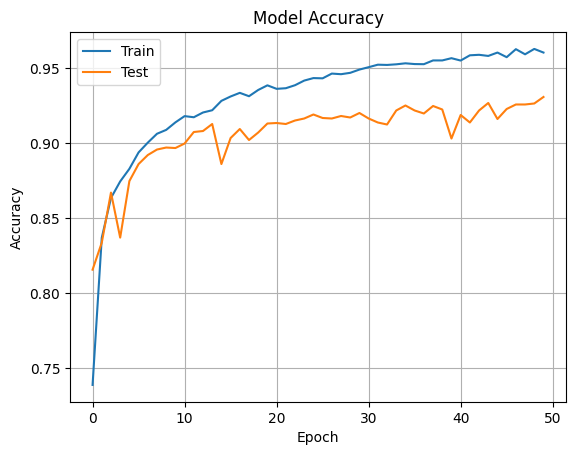

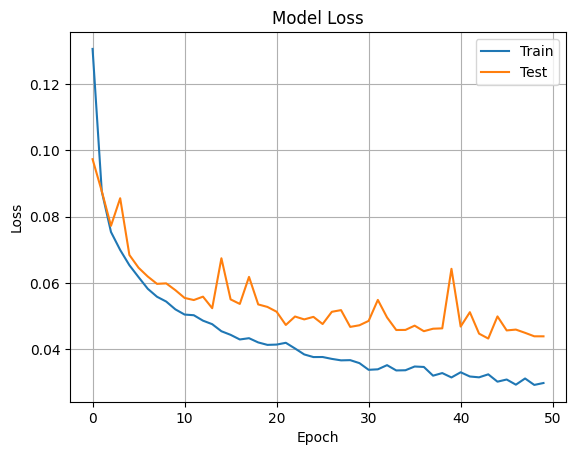

In [ ]:
import matplotlib.pyplot as plt
# Accuracy Traning Curve
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

# Loss Curve
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel( 'Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

94/94 [==============================] - 0s 3ms/step


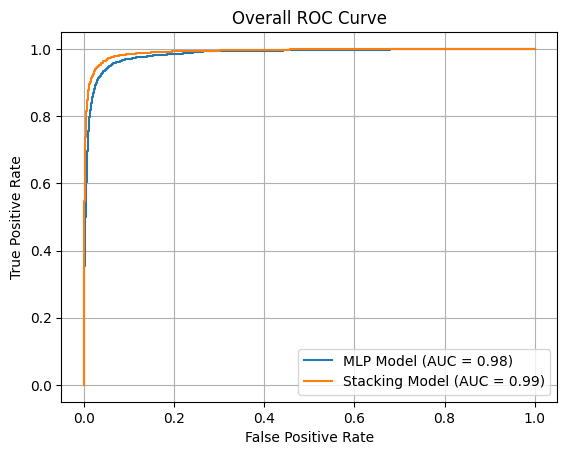

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# y_test를 이진화
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # 0, 1, 2는 클래스 레이블

# MLP 모델의 예측 확률 얻기
preds_mlp_proba = mlp_model.predict(X_test_re)

# 스태킹 모델의 예측 확률 얻기
try:
    stacking_proba = meta_model.predict_proba(meta_test)
except AttributeError:
    stacking_proba = meta_model.predict(meta_test)

# 스태킹 모델의 예측 확률이 1차원 배열이면 2차원으로 reshape
if stacking_proba.ndim == 1:
    stacking_proba = stacking_proba.reshape(-1, 1)

# 다중 클래스 ROC 곡선 그리기
# 'micro' 평균을 사용하여 전체 ROC 곡선을 계산
fpr_mlp, tpr_mlp, _ = roc_curve(y_test_bin.ravel(), preds_mlp_proba.ravel())
roc_auc_mlp = roc_auc_score(y_test_bin, preds_mlp_proba, average='micro')

fpr_stacking, tpr_stacking, _ = roc_curve(y_test_bin.ravel(), stacking_proba.ravel())
roc_auc_stacking = roc_auc_score(y_test_bin, stacking_proba, average='micro')

# 전체 ROC 곡선 그리기
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP Model (AUC = {roc_auc_mlp:.2f})')
plt.plot(fpr_stacking, tpr_stacking, label=f'Stacking Model (AUC = {roc_auc_stacking:.2f})')

# ROC 곡선 및 AUC 표시 설정
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Overall ROC Curve')
plt.legend()
plt.grid(True)  # 그리드 추가
plt.show()


In [ ]:
# 모델 이름과 정확도를 딕셔너리에 저장
accuracy_dict = {
    'Bagging Model': bagging_acc,
    'Boosting Model': boosting_acc,
    'Random Forest Model': rf_acc,
    'Weighted Averaging Ensemble': aw_ensemble_acc,
    'Voting Ensemble': voting_ensemble_acc,
    'Stacking (Meta) Model': meta_acc,
    'MLP Model' : mlp_acc
}

# 정확도를 기준으로 딕셔너리를 정렬
sorted_accuracy = sorted(accuracy_dict.items(), key=lambda item: item[1], reverse=True)

# 정렬된 결과 출력
print("Model Accuracy Ranking:")
for rank, (model, acc) in enumerate(sorted_accuracy, 1):
    print(f"{rank}. {model}: {acc:.4f}")


Model Accuracy Ranking:
1. Stacking (Meta) Model: 0.9443
2. Random Forest Model: 0.9390
3. Weighted Averaging Ensemble: 0.9360
4. Bagging Model: 0.9353
5. Voting Ensemble: 0.9327
6. MLP Model: 0.9307
7. Boosting Model: 0.8807


In [1]:
# 성능차 비교 t-test   MLP VS Stacking
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_rel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def get_meta(base_models, X_train, y_train, X_test):
    meta_train = np.zeros((X_train.shape[0], len(base_models)*3))
    meta_test = np.zeros((X_test.shape[0], len(base_models)*3))

    for i, model in enumerate(base_models):
        meta_train[:, i] = model.predict(X_train)
        meta_test[:, i] = model.predict(X_test)

    return meta_train, meta_test

bs_models = [bagging_model, boosting_model, rf_model]
# 교차 검증 설정
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
stacking_scores = []
mlp_scores = []

# 교차 검증 수행
for train_index, test_index in kf.split(X, y):
    # 데이터 전처리
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train.shape)
    # 데이터 평탄화 및 정규화
    X_train_flat = X_train.reshape((X_train.shape[0], -1)) / 255.0
    X_test_flat = X_test.reshape((X_test.shape[0], -1)) / 255.0

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_flat)
    X_test_scaled = scaler.transform(X_test_flat)


    X_train_re = X_train.reshape(12000, 1024)
    X_test_re = X_test.reshape(3000, 1024)

    X_train_re = X_train_re.astype('float32') / 255.0
    X_test_re = X_test_re.astype('float32') / 255.0
    # 카테고리 데이터로 변환 (MLP용)
    y_train_categorical = to_categorical(y_train, num_classes=3)
    y_test_categorical = to_categorical(y_test, num_classes=3)

    hist = mlp_model.fit(X_train_re, y_train_categorical, epochs=50, batch_size=64,
                     validation_data=(X_test_re, y_test_categorical))
    # MLP 모델 로드 및 평가
    preds_mlp = mlp_model.predict(X_test_scaled)
    preds_mlp_labels = np.argmax(preds_mlp, axis=1)
    mlp_scores.append(accuracy_score(y_test, preds_mlp_labels))

    for md in bs_models:
      md.fit(X_train_scaled, y_train)
    # 베이스 모델 로드 및 메타 피처 생성
    meta_train1, meta_test1 = get_meta(bs_models, X_train_scaled, y_train, X_test_scaled)
    aw_ensemble_pred_train = weighted_predict_ensemble(bs_models, weights, X_train_scaled)
    aw_ensemble_pred_test = weighted_predict_ensemble(bs_models, weights, X_test_scaled)

    voting_ensemble_pred_labels_train = majority_voting(bs_models, X_train_scaled)
    voting_ensemble_pred_labels_test = majority_voting(bs_models, X_test_scaled)

    # Weighted Averaging 및 Majority Voting 결과 추가
    meta_train1 = np.hstack((meta_train1, aw_ensemble_pred_train, voting_ensemble_pred_labels_train.reshape(-1, 1)))
    meta_test1 = np.hstack((meta_test1, aw_ensemble_pred_test, voting_ensemble_pred_labels_test.reshape(-1, 1)))
    # 메타 모델 로드 및 평가
    preds_stacking = meta_model.predict(meta_test1)
    stacking_scores.append(accuracy_score(y_test, preds_stacking))

# 교차 검증 결과 출력
print("스태킹 모델 교차 검증 점수: ", stacking_scores)
print("스태킹 모델 평균 정확도: ", np.mean(stacking_scores))
print("MLP 모델 교차 검증 점수: ", mlp_scores)
print("MLP 모델 평균 정확도: ", np.mean(mlp_scores))

# t-검정을 사용하여 두 모델의 성능 비교
t_stat, p_value = ttest_rel(stacking_scores, mlp_scores)
print(f"T-TEST 결과: t-statistic = {t_stat}, p-value = {p_value}")

NameError: name 'bagging_model' is not defined

In [ ]:
import numpy as np
from scipy.stats import t, ttest_rel

# 평균 차이와 표준 편차 계산
mean_diff = np.mean(stacking_scores) - np.mean(mlp_scores)
std_diff = np.std(stacking_scores - mlp_scores)
print(f"Mean Difference (Stacking - MLP): {mean_diff:.4f}, Standard Deviation of Difference: {std_diff:.4f}")

# 신뢰 수준 및 p-value에 따른 유의미성 판단
confidence_levels = [90, 95, 99]
p_thresholds = [0.1, 0.05, 0.01]

# 자유도 계산 (n-1)
df = len(stacking_scores) - 1

for i, confidence_level in enumerate(confidence_levels):
    # 양측 검정을 위한 t-임계값 계산
    critical_t = t.ppf(1 - p_thresholds[i] / 2, df)
    if abs(t_stat) > critical_t:
        print(f"At the {confidence_level}% confidence level (|t-stat| > {critical_t:.4f}), the difference in performance is statistically significant.")
    else:
        print(f"At the {confidence_level}% confidence level (|t-stat| <= {critical_t:.4f}), the difference in performance is not statistically significant.")
